## Problem Description

In this exercise, we will work on a problem similar to the one we have previously discussed to reinforce the concepts we have learned. The context of this optimization problem is in a manufacturing setting. We will assist Alan, the owner and manufacturer of Luxury Sofas, in determining the optimal quantities of different types of sofas to produce in the next production cycle.


![problem_description](img/problem_1.png)

Alan's company manufactures and sells two models of sofas: couch and daybed. Alan has access to an unlimited number of sofa frames from a local supplier. He adds designer wooden legs and designer fabrics to the frames to create the sofas. For the next production cycle, Alan has 200 sets of legs available, which means he can produce up to 200 sofas.

The key difference between the two sofa models lies in the amount of fabric and labor required. The couch requires 6 hours of labor and 16 feet of fabric, while the daybed requires 9 hours of labor and 12 feet of fabric. Alan has 1566 production labor hours and 2880 feet of fabric available for the next production cycle.

Alan earns a profit of $350 for each couch and $300 for each daybed he produces. He is confident that he will be able to sell all the sofas he produces. The objective is to determine the optimal quantities of couches and daybeds to maximize profits in the next production cycle.


## Your Task

Formulate this problem as a linear optimization problem. Define the decision variables, objective function, and constraints based on the given information. Then, try to find the optimal solution that maximizes Alan's profits.

Once you have formulated the problem, proceed to the next step where we will compare our solutions and explore how to solve these types of problems using graphical methods.

![img](https://media.giphy.com/media/26gR0YFZxWbnUPtMA/giphy.gif)

**How many decision variables are there in this problem?**


a) 1


b) 2


c) 3


d) 4
<details>
<summary>Click to show answer</summary>
There are 2 decision variables in this problem – the number of couches and the number of daybeds that Alan needs to produce in the next production cycle.
</details>

## Formulating the Problem

To formulate the given problem as a linear optimization problem, we can follow these 7 steps:

<details>
<summary><strong>Step 1: Identify the Objective</strong></summary>
    
The objective is to maximize profits by determining the quantities of couches and daybeds to produce.
</details>

<details>
<summary><strong>Step 2: Specify Decision Variables</strong></summary>
    
Let X represent the quantity of couches to produce and Y represent the quantity of daybeds to produce.
</details>

<details>
<summary><strong>Step 3: Formulate the Objective Function</strong></summary>
    
The objective function is to maximize the profit, expressed as: Maximize Profit = 350X + 300Y.
</details>

<details>
<summary><strong>Step 4: Define Constraints</strong></summary>
    
Based on the given information, we have the following constraints:

- Labor Constraint: 6X + 9Y ≤ 1566 (hours of labor)
- Fabric Constraint: 16X + 12Y ≤ 2880 (feet of fabric)
- Legs Constraint: X + Y ≤ 200 (number of sofa sets)
</details>

<details>
<summary><strong>Step 5: Consider Hidden Conditions</strong></summary>
We can't produce half a couch or bed. In this case only discreate values are valid solutions.
</details>

<details>
<summary><strong>Step 6: Formulate the Complete Model</strong></summary>
    
Combining the objective function and constraints, the linear program can be written as:

Maximize Profit = 350X + 300Y

Subject to:
- 6X + 9Y ≤ 1566
- 16X + 12Y ≤ 2880
- X + Y ≤ 200

X, Y ≥ 0
</details>

<details>
<summary><strong>Step 7: Review and Refine</strong></summary>
    
Double-check the formulation to ensure accuracy and clarity.
</details>

In [3]:
# Problem Formulation
from pulp import *

# Create the problem variable
prob = LpProblem("Luxury_Sofas_Profit_Optimization", LpMaximize)

# Define the decision variables
couches = LpVariable("Couches", lowBound=0, cat='Integer')  # Quantity of couches to produce
daybeds = LpVariable("Daybeds", lowBound=0, cat='Integer')  # Quantity of daybeds to produce

# Set up the objective function
prob += 350 * couches + 300 * daybeds, "Total_Profit"

# Add the constraints
prob += 6 * couches + 9 * daybeds <= 1566, "Labor_Constraint"
prob += 16 * couches + 12 * daybeds <= 2880, "Fabric_Constraint"
prob += couches + daybeds <= 200, "Legs_Constraint"

# Solve the problem
prob.solve()

# Print the optimal solution
print("Optimal Solution:")
print("Couches =", couches.varValue)
print("Daybeds =", daybeds.varValue)
print("Total Profit =", prob.objective.value())

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/d3r/Documents/Github/python-decision-making-support-analysis/decision/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/vb/hfzj34dx0zv92bq7vy7zjhyw0000gn/T/d6e641a62bec4cb49d3eb1446c9fb0e3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/vb/hfzj34dx0zv92bq7vy7zjhyw0000gn/T/d6e641a62bec4cb49d3eb1446c9fb0e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 28 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 66000 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 49.9999
Cbc0012I Integer solution of -66000 found by DiveCoefficient after 0 ite

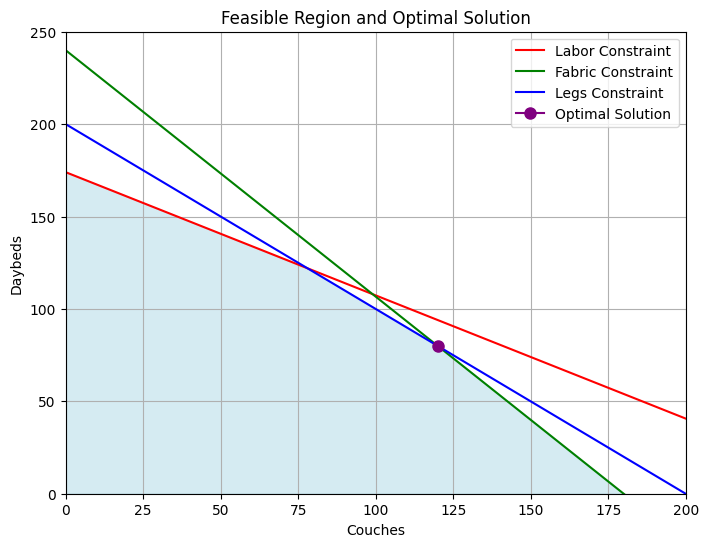

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of quantities for couches
couches_range = np.linspace(0, 200, 201)

# Calculate the corresponding quantities for daybeds based on the constraints
daybeds_labor = (1566 - 6 * couches_range) / 9
daybeds_fabric = (2880 - 16 * couches_range) / 12
daybeds_legs = 200 - couches_range

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the constraints
ax.plot(couches_range, daybeds_labor, label='Labor Constraint', color='red')
ax.plot(couches_range, daybeds_fabric, label='Fabric Constraint', color='green')
ax.plot(couches_range, daybeds_legs, label='Legs Constraint', color='blue')

# Plot the feasible region
feasible_region = np.minimum.reduce([daybeds_labor, daybeds_fabric, daybeds_legs])
ax.fill_between(couches_range, 0, feasible_region, where=(feasible_region >= 0), color='lightblue', alpha=0.5)

# Plot the optimal solution
optimal_couches = 120
optimal_daybeds = 80
ax.plot(optimal_couches, optimal_daybeds, marker='o', markersize=8, color='purple', label='Optimal Solution')

# Set labels and title
ax.set_xlabel('Couches')
ax.set_ylabel('Daybeds')
ax.set_title('Feasible Region and Optimal Solution')

# Add legend and grid
ax.legend()
ax.grid(True)

# Adjust plot limits
plt.xlim(0, 200)
plt.ylim(0, 250)

# Display the plot
plt.show()
